In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import auc, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
import category_encoders as ce

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('fraud_train.csv')

# List feature yang tidak digunakan
<br>X: feature yang tidak dijelaskan di kamus data, dan tidak dapat ditemukan korelasi antara feature X dengan label fraud
<br>id_tanggal_transaksi awal: tidak dapat ditemukan korelasi antara feature ini dengan label fraud, dan mengurangi score dari <br>sebuah model
<br>nama_merchant: mempunyai pattern/pola yang sama terhadap feature id_merchant. sehingga hanya dipilih salah satu
<br>tipe_transaksi: mempunyai pattern/pola yang sama terhadap feature nama_transaksi. sehingga hanya dipilih salah satu
<br>id_negara: tidak dapat ditemukan korelasi dengan label fraud, serta mempunya sample kategori yang sangat sedikit
<br>nama_negara: tidak dapat ditemukan korelasi dengan label fraud, serta mempunya sample kategori yang sangat sedikit
<br>waktu_transaksi: mempunyai pola yang hampir sama terhadap feature kuartal_transaksi
<br>id_channel: mempunyai pola yang sama terhadap feature nama_channel
<br>flag_transaksi_finansial: semua nilai feature ini mempunyai nilai False
<br>bank_pemilik_kartu: semua nilai feature ini mempunyai nilai 999
<br>status_transaksi: semua nilai feature ini mempunyai nilai 3



In [4]:
df

X  id_tanggal_transaksi_awal  tanggal_transaksi_awal  tipe_kartu  \
0       4676                    2457646                 2457726         111   
1        788                    2457419                 2457507         111   
2       1520                    2457521                 2457612           2   
3       9346                    2457659                 2457746         103   
4       2914                    2457311                 2457385           0   
5       6947                    2457413                 2457453         111   
6      14131                    2457615                 2457640          93   
7       4811                    2457429                 2457463           0   
8       1458                    2457371                 2457453          93   
9       4123                    2457320                 2457365          93   
10      6709                    2457350                 2457367          93   
11       688                    2457334                 2457344         111   
12      7185                    2457366                 2457390         111   
13      7157                    2457471                 2457549         111   
14     11637                    2457548                 2457623           4   
15      9001                    2457352                 2457358         111   
16      3438                    2457344                 2457385         111   
17       186                    2457394                 2457446         103   
18      4758                    2457659                 2457677          93   
19      7191                    2457585                 2457661         104   
20      7249                    2457425                 2457495         111   
21      5508                    2457555                 2457614         104   
22      9188                    2457445                 2457539         111   
23      8743                    2457369                 2457452          93   
24     14217                    2457567                 2457576          93   
25     12467                    2457410                 2457460          93   
26     13264                    2457503                 2457561          93   
27      7863                    2457580                 2457626          93   
28      5863                    2457439                 2457452           0   
29     13596                    2457362                 2457447         111   
...      ...                        ...                     ...         ...   
13074   1901                    2457603                 2457682          93   
13075   9874                    2457565                 2457607         103   
13076  10689                    2457606                 2457624         111   
13077  14469                    2457646                 2457689         111   
13078  13104                    2457457                 2457470           0   
13079  11449                    2457597                 2457646         111   
13080  12880                    2457384                 2457449         111   
13081  12099                    2457359                 2457446         111   
13082   1625                    2457576                 2457631         111   
13083  12921                    2457510                 2457602         111   
13084    964                    2457447                 2457519         103   
13085   1761                    2457326                 2457336         111   
13086  10358                    2457384                 2457396           1   
13087   8467                    2457628                 2457677         111   
13088   8473                    2457436                 2457480         104   
13089  13130                    2457448                 2457451          93   
13090   1855                    2457423                 2457501         111   
13091  14057                    2457587                 2457662          93   
13092   1532                    2457427                 24574

In [5]:
# membuang fitur2 yang tidak mempunyai makna
df = df.drop(columns=['X','id_tanggal_transaksi_awal','tanggal_transaksi_awal','flag_transaksi_finansial','bank_pemilik_kartu'
                     ,'status_transaksi'])

# Encoding

Melakukan Mean Encoding agar fitur yang terdiri dari kategori-kategori bisa mempunyai korelasi dengan label fraud.

Mean Encoding berfungsi untuk memberikan nilai pada fitur2 categorical agar fitur categorical tersebut bisa memiliki korelasi dengan target.
<br> tidak disarankan menggunakan Mean Encoding untuk fitur yang mempunyai nilai kontinyu(Contoh: uang, waktu, dll)

Berikut contoh perbedaan antara pemberian label biasa dengan label menggunakan Mean Encoding.

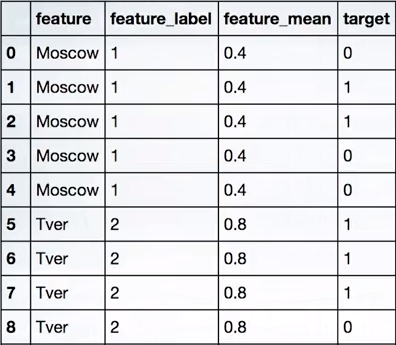


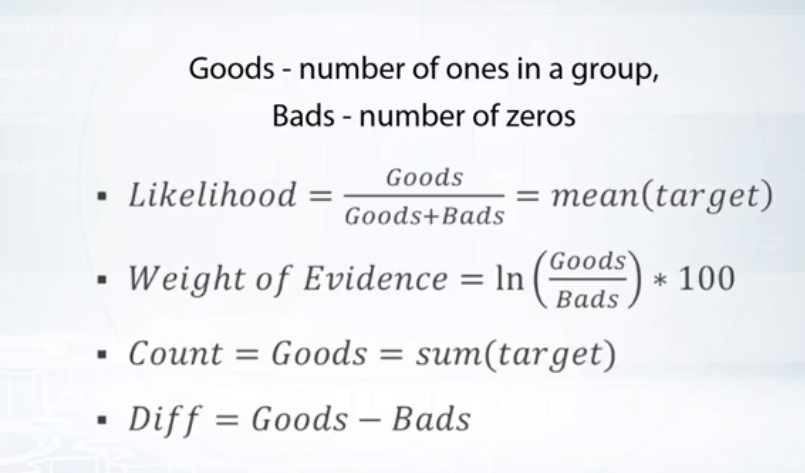

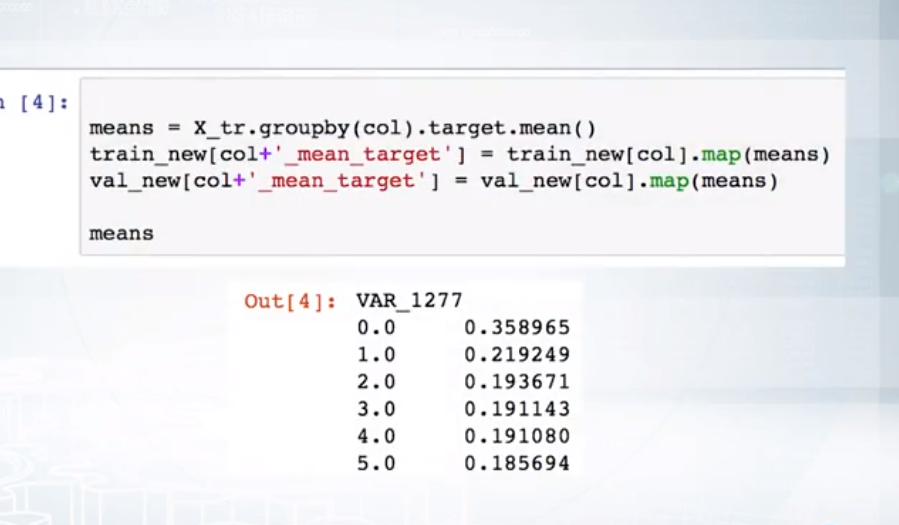

Terkadang fitur yang dijalankan dengan mean encoding membutuhkan jumlah split yg cukup besar sehingga mampu mengekstrak informasi dari fitur2 tersebut.(contoh dalam  melakukan binning fitur kontinyu).




Mean encoding tanpa regularization dan smoothing dapat menyebabkan noise(overfitting) pada model(auc score semakin kecil).


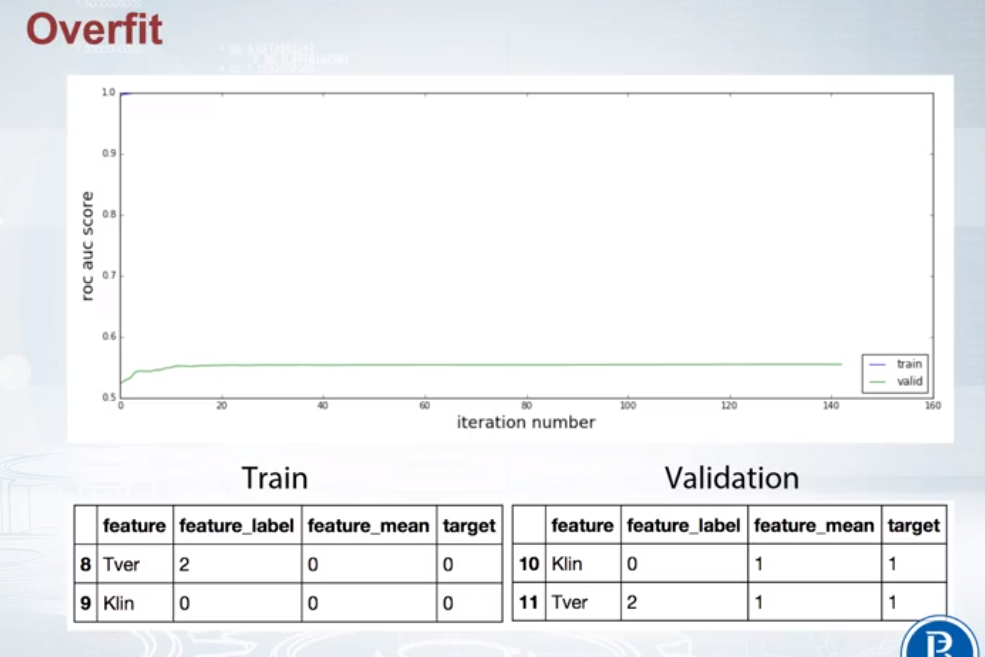

Teknik reduce overfitting
(Smoothing)
<br>Jika fitur mempunyai jumlah kategori yang besar, artinya mean encoding dapat dilakukan.


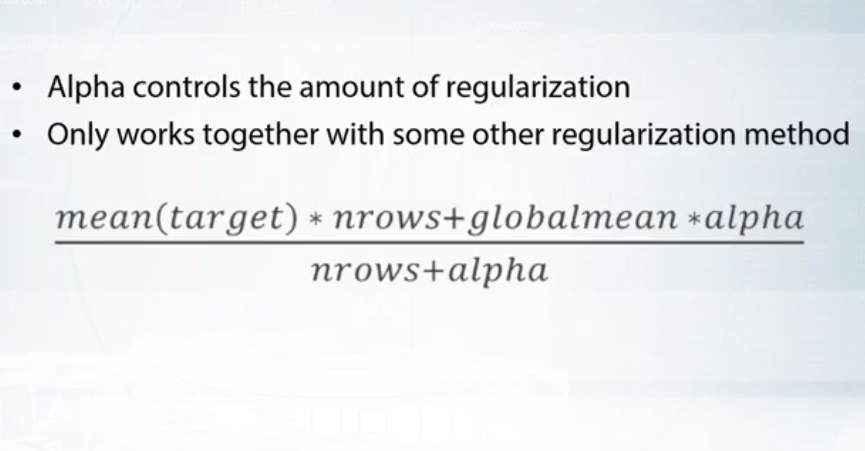

alpha sebagai hyperparameter untuk mengontrol ukuran dalam regularization.
<br>Saat alpha 0, kita tidak mempunyai regularization, saat alpha menjadi tak hingga, hasilnya menjadi globalmean.
<br>alpha = category size


Correct validation:
<br>Sebelum di mean encoding, Test data harus dipisahkan terlebih dahulu.
<br>Train data yang berisi X_tr(training set) dan X_val(validation set) diperbolehkan untuk dilakukan mean encoding sebelum di split.
<br>


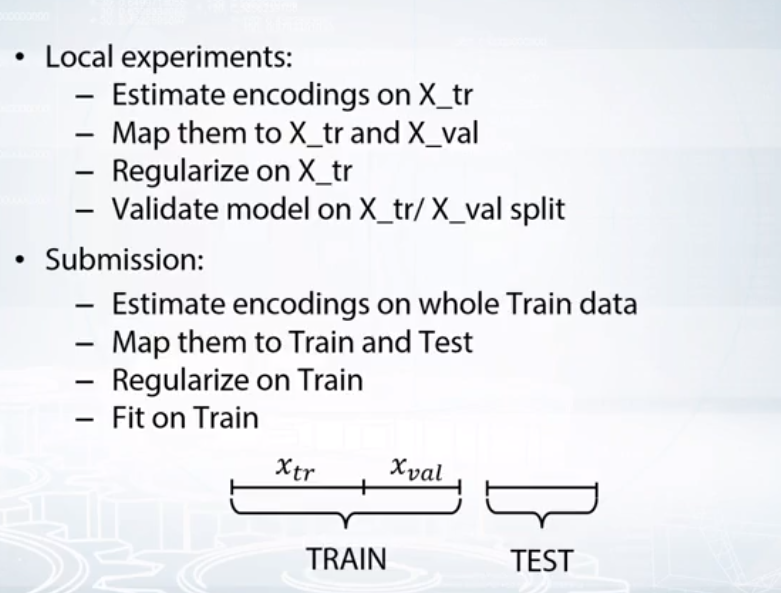

# Summary
Advantages:
<br> Sangat patut dicoba untuk data yang mempunyai banyak categorical variable.
<br> Powerful dalam menentukan feature interaction / feature engineering.
<br> Disadvantages:
<br> Membutuhkan proses validasi yang rumit(harus hati-hati), karena banyak cara untuk overfit.
<br> Tidak semua berguna dalam semua dataset.

In [6]:
from category_encoders import *
import pandas as pd


# prepare some data

y = df.flag_transaksi_fraud.values
X = df.drop(columns= ['rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi','flag_transaksi_fraud'])

# use binary encoding to encode two categorical features
enc = TargetEncoder(cols=['tipe_kartu', 'id_merchant', 'nama_merchant', 'tipe_mesin',
       'tipe_transaksi', 'nama_transaksi', 'nilai_transaksi', 'id_negara',
       'nama_negara', 'nama_kota', 'lokasi_mesin', 'pemilik_mesin',
       'waktu_transaksi', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'id_channel']).fit(X, y)

# transform the dataset
numeric_dataset = enc.transform(X)


In [7]:
numeric_dataset.head()

tipe_kartu  id_merchant  nama_merchant    tipe_mesin  tipe_transaksi  \
0    0.059772     0.074510       0.074510  4.566093e-04        0.046805   
1    0.059772     0.074510       0.074510  3.920455e-01        0.379762   
2    0.087629     0.074510       0.074510  3.920455e-01        0.379762   
3    0.071304     0.018348       0.018348  6.822344e-02        0.027828   
4    0.075207     0.074510       0.074510  4.191767e-07        0.046805   

   nama_transaksi  nilai_transaksi  id_negara  nama_negara  nama_kota  \
0        0.046805         0.125000   0.067458     0.067463   0.051691   
1        0.387173         0.109139   0.067458     0.067463   0.595330   
2        0.387173         0.238532   0.067458     0.067463   0.056180   
3        0.027828         0.001227   0.067458     0.067463   0.032520   
4        0.046805         0.020513   0.067458     0.067463   0.068966   

   lokasi_mesin  pemilik_mesin  waktu_transaksi  kuartal_transaksi  \
0  8.132434e-03       0.047688         0.008132           0.055037   
1  8.282126e-01       0.068223         0.595330           0.072895   
2  1.834811e-02       0.068223         0.241379           0.068125   
3  1.834811e-02       0.018348         0.018348           0.068125   
4  4.191767e-07       0.047688         0.068223           0.068125   

   kepemilikan_kartu  nama_channel  id_channel  
0           0.044934      0.047688    0.047688  
1           0.389391      0.399293    0.392045  
2           0.389391      0.399293    0.392045  
3           0.044934      0.029169    0.029169  
4           0.044934      0.047688    0.047688

Merubah nilai fitur2 di dataframe menjadi nilai yang sudah di encode

In [8]:
cols = ['tipe_kartu', 'id_merchant', 'nama_merchant', 'tipe_mesin',
       'tipe_transaksi', 'nama_transaksi', 'nilai_transaksi', 'id_negara',
       'nama_negara', 'nama_kota', 'lokasi_mesin', 'pemilik_mesin',
       'waktu_transaksi', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'id_channel']

df2=df
for col in cols:
    df2[col] = numeric_dataset[col]

#mengetahui korelasi antar fitur
df2.corr()

tipe_kartu  id_merchant  nama_merchant  \
tipe_kartu                    1.000000    -0.008447       0.009245   
id_merchant                  -0.008447     1.000000       0.358842   
nama_merchant                 0.009245     0.358842       1.000000   
tipe_mesin                    0.025287     0.083136       0.080847   
tipe_transaksi               -0.003286     0.059236       0.056957   
nama_transaksi               -0.001118     0.058947       0.056679   
nilai_transaksi              -0.034264     0.161733       0.157488   
id_negara                     0.008870     0.005375       0.005261   
nama_negara                  -0.004194     0.005741       0.005620   
nama_kota                    -0.003490     0.026718       0.027729   
lokasi_mesin                  0.023075     0.058064       0.060280   
pemilik_mesin                 0.019866     0.086322       0.106428   
waktu_transaksi               0.015561     0.076878       0.082724   
kuartal_transaksi             0.000311     0.015791       0.017864   
kepemilikan_kartu            -0.000485     0.035059       0.034319   
nama_channel                  0.000140     0.057993       0.056770   
id_channel                   -0.001361     0.058361       0.057130   
rata_rata_nilai_transaksi    -0.128273     0.033418       0.019660   
maksimum_nilai_transaksi     -0.216758     0.007903       0.004524   
minimum_nilai_transaksi       0.016124     0.017808       0.012330   
rata_rata_jumlah_transaksi   -0.130709     0.010369       0.013749   
flag_transaksi_fraud          0.069081     0.138170       0.140271   

                            tipe_mesin  tipe_transaksi  nama_transaksi  \
tipe_kartu                    0.025287       -0.003286       -0.001118   
id_merchant                   0.083136        0.059236        0.058947   
nama_merchant                 0.080847        0.056957        0.056679   
tipe_mesin                    1.000000        0.695101        0.703345   
tipe_transaksi                0.695101        1.000000        0.989154   
nama_transaksi                0.703345        0.989154        1.000000   
nilai_transaksi               0.138851        0.116206        0.116609   
id_negara                     0.109258        0.152185        0.155450   
nama_negara                   0.116694        0.158939        0.162664   
nama_kota                     0.372345        0.506631        0.502927   
lokasi_mesin                  0.458690        0.429431        0.432706   
pemilik_mesin                 0.439174        0.587919        0.586974   
waktu_transaksi               0.347878        0.282606        0.285670   
kuartal_transaksi             0.042320        0.036022        0.035267   
kepemilikan_kartu             0.706697        0.980053        0.982371   
nama_channel                  0.704296        0.971615        0.983172   
id_channel                    0.708764        0.978462        0.989628   
rata_rata_nilai_transaksi     0.001151        0.022391        0.023140   
maksimum_nilai_transaksi     -0.022904       -0.003529       -0.003069   
minimum_nilai_transaksi       0.025304        0.010027        0.010132   
rata_rata_jumlah_transaksi   -0.019252       -0.011769       -0.011013   
flag_transaksi_fraud          0.516115        0.346375        0.348072   

                            nilai_transaksi  id_negara  nama_negara  \
tipe_kartu                        -0.034264   0.008870    -0.004194   
id_merchant                        0.161733   0.005375     0.005741   
nama_merchant                      0.157488   0.005261     0.005620   
tipe_mesin                         0.138851   0.109258     0.116694   
tipe_transaksi                     0.116206   0.152185     0.158939   
nama_transaksi                     0.116609   0.155450     0.162664   
nilai_transaksi                    1.000000   0.055238     0.062446   
id_negara                          0.055238   1.000000     0.835580   
nama_negara                        0.062446   0.835580     1.000000   
nama

Contoh pengamatan feature antara waktu_transaksi dan kuartal_transaksi. Dalam hal ini waktu_transaksi bukan merupakan suatu fitur categorical, sehingga harus diperiksa saat sebelum penggunaan mean encoding

In [9]:
#contoh pengamatan yang salah karena tiap fitur sudah di encode terhadap label fraud
df2[['waktu_transaksi', 'kuartal_transaksi']].corr()

waktu_transaksi  kuartal_transaksi
waktu_transaksi           1.000000           0.066034
kuartal_transaksi         0.066034           1.000000

In [10]:
#contoh pengamatan yang benar (fitur yang bukan merupakan non-categorical harus diperiksa terlebih dahulu 
# sebelum dilakukan encoding)
df[['waktu_transaksi', 'kuartal_transaksi']].corr()

waktu_transaksi  kuartal_transaksi
waktu_transaksi           1.000000           0.066034
kuartal_transaksi         0.066034           1.000000

In [11]:
# Membuang fitur yang mempunyai korelasi yang sama dengan fitur yang lain
df3 = df2[['lokasi_mesin','nama_merchant','tipe_kartu', 'tipe_mesin', 'nama_transaksi', 'nilai_transaksi',
       'nama_kota', 'pemilik_mesin', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'rata_rata_nilai_transaksi', 'maksimum_nilai_transaksi',
       'minimum_nilai_transaksi', 'rata_rata_jumlah_transaksi',
       'flag_transaksi_fraud']]

# Menormalisasikan fitur2 yang berupa non-categorical 
Menormalisasikan fitur-fitur agar model nantinya kuat terhadap outliers.
Outliers adalah data yang menyimpang terlalu jauh dari data yang lainnya dalam suatu rangkaian data. Adanya data outliers ini akan membuat analisis terhadap serangkaian data menjadi bias, atau tidak mencerminkan fenomena yang sebenarnya.

Scaler ini menghilangkan median dan skala data menurut
rentang kuantil (default ke IQR: Interkuartil Range).
IQR adalah kisaran antara kuartil ke-1 (kuantum ke-25)
dan kuartil ke-3 (kuantil ke-75).


In [12]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
cols = ['nilai_transaksi','rata_rata_nilai_transaksi','maksimum_nilai_transaksi','minimum_nilai_transaksi',
        'rata_rata_jumlah_transaksi']
for col in cols:
    df3[col] = rob_scaler.fit_transform(df2[col].values.reshape(-1,1))+1


In [13]:
df3.head()

lokasi_mesin  nama_merchant  tipe_kartu    tipe_mesin  nama_transaksi  \
0  8.132434e-03       0.074510    0.059772  4.566093e-04        0.046805   
1  8.282126e-01       0.074510    0.059772  3.920455e-01        0.387173   
2  1.834811e-02       0.074510    0.087629  3.920455e-01        0.387173   
3  1.834811e-02       0.018348    0.071304  6.822344e-02        0.027828   
4  4.191767e-07       0.074510    0.075207  4.191767e-07        0.046805   

   nilai_transaksi  nama_kota  pemilik_mesin  kuartal_transaksi  \
0         1.986033   0.051691       0.047688           0.055037   
1         1.791700   0.595330       0.068223           0.072895   
2         3.377078   0.056180       0.068223           0.068125   
3         0.469512   0.032520       0.018348           0.068125   
4         0.705809   0.068966       0.047688           0.068125   

   kepemilikan_kartu  nama_channel  rata_rata_nilai_transaksi  \
0           0.044934      0.047688                   1.277223   
1           0.389391      0.399293                   1.310299   
2           0.389391      0.399293                  14.048088   
3           0.044934      0.029169                   0.718799   
4           0.044934      0.047688                   0.634390   

   maksimum_nilai_transaksi  minimum_nilai_transaksi  \
0                  1.300000                 0.294136   
1                  1.320000                 0.817696   
2                  8.520000                 1.126702   
3                  1.070753                 0.294136   
4                  0.720000                 2.650157   

   rata_rata_jumlah_transaksi  flag_transaksi_fraud  
0                    1.567568                     0  
1                    1.207207                     1  
2                    1.270270                     0  
3                    0.891892                     0  
4                    0.423423                     0

Melakukan reindex agar kolom dataframe terlihat lebih rapi

In [14]:
df4 = df3.reindex(['nilai_transaksi','rata_rata_nilai_transaksi','maksimum_nilai_transaksi','minimum_nilai_transaksi',
        'rata_rata_jumlah_transaksi','lokasi_mesin',
       'nama_merchant','tipe_kartu', 'tipe_mesin', 'nama_transaksi', 'nama_kota',
       'pemilik_mesin', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'flag_transaksi_fraud'], axis = 1)

In [15]:
df4.head()

nilai_transaksi  rata_rata_nilai_transaksi  maksimum_nilai_transaksi  \
0         1.986033                   1.277223                  1.300000   
1         1.791700                   1.310299                  1.320000   
2         3.377078                  14.048088                  8.520000   
3         0.469512                   0.718799                  1.070753   
4         0.705809                   0.634390                  0.720000   

   minimum_nilai_transaksi  rata_rata_jumlah_transaksi  lokasi_mesin  \
0                 0.294136                    1.567568  8.132434e-03   
1                 0.817696                    1.207207  8.282126e-01   
2                 1.126702                    1.270270  1.834811e-02   
3                 0.294136                    0.891892  1.834811e-02   
4                 2.650157                    0.423423  4.191767e-07   

   nama_merchant  tipe_kartu    tipe_mesin  nama_transaksi  nama_kota  \
0       0.074510    0.059772  4.566093e-04        0.046805   0.051691   
1       0.074510    0.059772  3.920455e-01        0.387173   0.595330   
2       0.074510    0.087629  3.920455e-01        0.387173   0.056180   
3       0.018348    0.071304  6.822344e-02        0.027828   0.032520   
4       0.074510    0.075207  4.191767e-07        0.046805   0.068966   

   pemilik_mesin  kuartal_transaksi  kepemilikan_kartu  nama_channel  \
0       0.047688           0.055037           0.044934      0.047688   
1       0.068223           0.072895           0.389391      0.399293   
2       0.068223           0.068125           0.389391      0.399293   
3       0.018348           0.068125           0.044934      0.029169   
4       0.047688           0.068125           0.044934      0.047688   

   flag_transaksi_fraud  
0                     0  
1                     1  
2                     0  
3                     0  
4                     0

# Feature Selection
Melakukan proses feature selection, untuk menentukan fitur-fitur terbaik yang layak untuk dilanjutkan ke tahap machine learning modelling

# Chi Squared

Chi Squared adalah suatu jenis uji terhadap 2 kelas atau lebih, untuk menentukan apakah kelas-kelas tersebut mempunyai perbedaan yang signifikan atau tidak

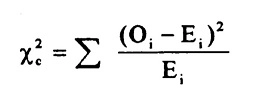

O = Observation, kejadian aktual terhadap suatu kelas<br>
E = Expected, kemungkinan terjadinya keluaran terhadap suatu kelas.

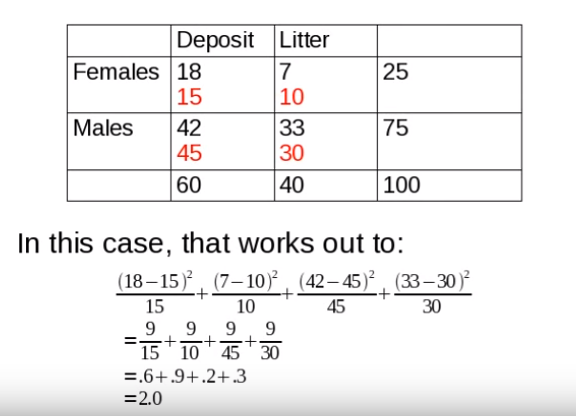

Jika nilai chi-squared melebihi nilai critical value(p-value), maka 2 kelas yang akan kita observasi adalah beda secara signifikan.

Untuk menentukan degree of freedom, df = total outcome - 1

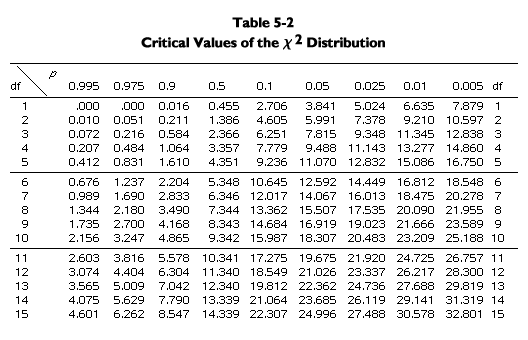

Dari gambar diatas didapatkan nilai chi squared sebesar 2.0.
<br>Karena kemungkinan keluaran adalah 2(Females dan Males), maka degree of freedom df = 2 -1 = 1
<br> Jika kita ambil nilai critical values = 0.05, maka didapatkan nilai sebesar 3.841, yang artinya Null Hypothesis akan benar terjadi jika chi squared kurang dari 3.841.
<br>Maka, perbandingan antara Males dan Females tidak mempunyai perbedaan yang signifikan atau yang biasa disebut Working Hypothesis(H1).



In [16]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y = df4.flag_transaksi_fraud.values
X = df4.drop('flag_transaksi_fraud', 1).values
X_new = SelectKBest(chi2, k=8).fit_transform(X, y)

X_new2 = pd.DataFrame(X_new)

df4 = pd.concat([X_new2, df3['flag_transaksi_fraud']], axis=1, join_axes=[X_new2.index])

#Structured Data yang siap dimodelkan
df4.head()

0         1             2             3         4         5  \
0  1.986033  0.294136  8.132434e-03  4.566093e-04  0.046805  0.047688   
1  1.791700  0.817696  8.282126e-01  3.920455e-01  0.387173  0.068223   
2  3.377078  1.126702  1.834811e-02  3.920455e-01  0.387173  0.068223   
3  0.469512  0.294136  1.834811e-02  6.822344e-02  0.027828  0.018348   
4  0.705809  2.650157  4.191767e-07  4.191767e-07  0.046805  0.047688   

          6         7  flag_transaksi_fraud  
0  0.044934  0.047688                     0  
1  0.389391  0.399293                     1  
2  0.389391  0.399293                     0  
3  0.044934  0.029169                     0  
4  0.044934  0.047688                     0

# Training Data

menggunakan Stratified ShuffleSplit cross-validator
Memisahkan data menjadi train data dan test data dengan  metode gabungan antara Kfold dan ShuffleSplit
Shufflesplit 



In [17]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print ('no frauds', round(df4['flag_transaksi_fraud'].value_counts()[0]/len(df4)* 100,2), '% of the dataset')
print ('frauds', round(df4['flag_transaksi_fraud'].value_counts()[1]/len(df4)* 100,2), '% of the dataset')

X = df4.drop('flag_transaksi_fraud', axis = 1)
y = df4['flag_transaksi_fraud']

sss= StratifiedShuffleSplit(n_splits = 5, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X,y):
    print ("Train", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

#mengubah menjadi array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#meilihat apakah train dan test data terdistribusi dengan baik
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)
print ( "-" * 100)

print('Label Distribution: \n')
print (train_counts_label / len(original_ytrain))
print (test_counts_label / len(original_ytest))




no frauds 93.18 % of the dataset
frauds 6.82 % of the dataset
Train [ 5516 12191  2355 ...  6639  9592  1860] Test: [ 9303 10821  2291 ...   165    25  1673]
Train [ 8512 10932  6478 ...  3721  6844  9467] Test: [ 7959 12543  2263 ...  9908  5376  1338]
Train [ 9440  1429  8711 ...  4031 10236  7467] Test: [ 7191  7472  9866 ...   249 10297  6190]
Train [1196 1774 1210 ... 1574 7338 4717] Test: [11301  8612  9016 ...  8151  9689  9050]
Train [ 7202 10770  3560 ... 12596  1812    51] Test: [11850   531 10572 ...  4129   446 11432]
----------------------------------------------------------------------------------------------------
Label Distribution: 

[0.93179433 0.06820567]
[0.93170546 0.06829454]


# SMOTE(Synthetic Minority Over-Sampling Technique)

<br>SMOTE membuat synthetic point dengan metode K-NN yang bertujuan untuk membuat data antara majority(non-fraud) dan minority(fraud) menjadi seimbang


# Modelling

Untuk modelling dilakukan dengan Decision Tree. Model ini nantinya akan menghasilkan score yang cukup bagus karena semua fitur pada model tersebut bersifat categorical

scikit learn kurang mendukung implementasi untuk fitur yang bersifat kategori. Oleh karena itu, maka harus di encode terlebih dahulu ke numerik.

# Decision Tree
scikit learn menggunakan Decision Tree jenis CART(Classification and Regression Trees). CART melakukan split terhadap dataset sehingga nantinya dapat dilakukan acuan untuk memberikan suatu label terhadap dataset.
<br><br>berikut contoh CART dengan 2 fitur yaitu X1 dan X2, terhadap target Y

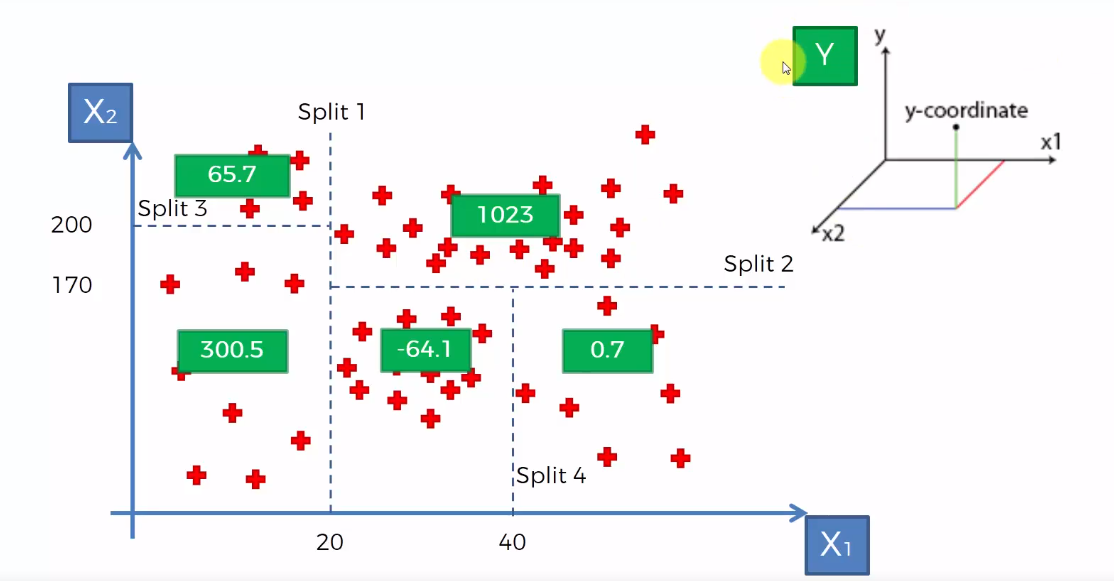

Cart menggunakan Gini Index untuk mengevaluasi splitpoint pada dataset

<br>Gini Index untuk target yang bersifat binary adalah sebagai berikut.

<br>Actual=1 predicted 1
<br>1 0 , 0,1, 0 0
<br>P(Target=1).P(Target=1) + P(Target=1).P(Target=0) + P(Target=0).P(Target=1) + P(Target=0).P(Target=0) = 1
<br>P(Target=1).P(Target=0) + P(Target=0).P(Target=1) = 1 — P^2(Target=0) — P^2(Target=1)

<br>G = 1 — P^2(Target=0) — P^2(Target=1)

<br>Gini Index memberikan skor terhadap pemisahan/split terhadap suatu classes. Split yang sempurna menghasilkan nilai 0, sedangkan yang terburuk adalah 0.5


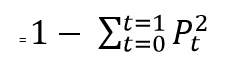

jika target mempunyai lebih dari 2 kategori, maka:

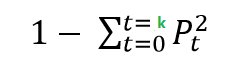

minimum gini index jika bernilai 0 maka artinya semua observasi hanya menuju ke 1 label

Langkah-langkah menentukan gini index:
1. Hitung gini index pada dataset
2. pada tiap fitur, hitung gini index pada setiap nilai, ambil nilai rata-rata pada attribute yang sudah di split, kemudian hitung gini gain.
3. pilih gini gain yang terbesar.
4. ulang sampai mendapatkan parameter yang terbaik

Contoh menghitung gini index

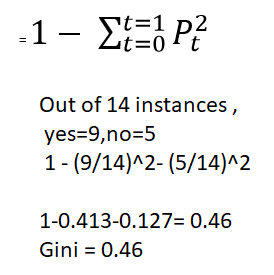

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

#list untuk menentukan score yang nantinya akan ditentukan dengan cara menghitung nilai rata-rata
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Menggunakan GridSearch untuk menentukan parameter terbaik untuk model
DecisionTreeClassifier()

tree_params ={'criterion':['gini', 'entropy'],'splitter':['best','random'], 
                 'max_depth': list(range(2,4 )), 'min_samples_leaf': list(range(5,7,1)),'max_leaf_nodes':[2, 5, 10, 20, 40]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=6)


# Implementasi SMOTE
# SMOTE dilakukan saat Cross Validation

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE('minority'), grid_tree) # SMOTE dilakukan saat Cross Validation.
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = grid_tree.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))

print('---' * 45)

Length of X (train): 10483 | Length of y (train): 10483
Length of X (test): 2621 | Length of y (test): 2621
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9391511683357177
precision: 0.5312211123967401
recall: 0.9272727272727274
f1: 0.6751685050503118
---------------------------------------------------------------------------------------------------------------------------------------


In [19]:
# menggunakan parameter terbaik untuk menentukan score
sm = SMOTE(ratio='minority', random_state=42)


# Data yang dituju
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)


# Logistic Regression
t0 = time.time()
best_est = grid_tree.best_estimator_
best_est.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.04150223731994629 sec


# Final score dari model


In [20]:
# Final Score
from sklearn.metrics import accuracy_score

# Decision Tree with SMOTE Technique
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': [ 'Oversampling (SMOTE)'], 'Accuracy': [ oversample_score]}
final_df = pd.DataFrame(data=d)

final_df

Technique  Accuracy
0  Oversampling (SMOTE)  0.942388

# ROC AUC
ROC(Receiver operating characteristic) Curve adalah kurva yang dibentuk berdasarkan performansi dari sebuah model. Kurva ini bertujuan untuk memberikan visualisasi tentang kualitas sebuah model dan membandingkan dengan model-model sebelumnya. Kurva ini dibuat berdasarkan Sensitivity/Recall dan Specificity dari sebuah model.

AUC(Area Under the Curve) adalah luas dari sebuah area yang dibentuk oleh kurva ROC. Biasanya untuk mengetahui skor dari performa sebuah model.

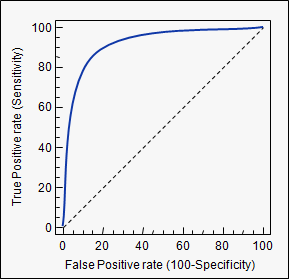

In [21]:


roc_auc_score(original_ytest, y_pred_sm)

0.9457858061210017

# Confusion Matrix

Confusion matrix adalah sebuah tabel untuk melihat performansi dari sebuah model. Tabel tersebut mempunyai ukuran 2x2, dan mempunyai nilai yaitu True Positive(TP), False Positive(FP), True Negative(TN), False Negative(FN)

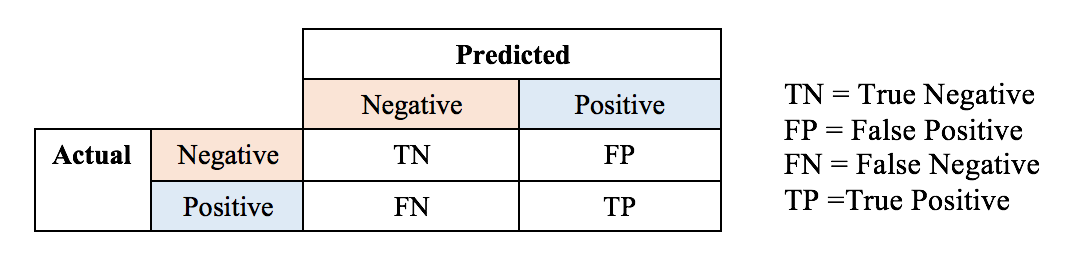

Adapun dari nilai-nilai tersebut dapat dilakukan pengukuran performansi dengan rumus sebagai berikut

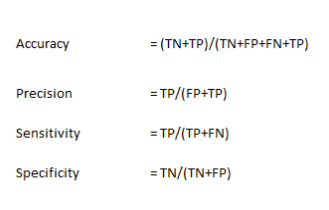

Accuracy:
<br>digunakan untuk mengukur akurasi secara keseluruhan sebuah model.
<br>Precision:
<br>pengukuran terhadap 1 kelas/kategori. Saat model memprediksi dengan benar, seberapa tepat prediksi model tersebut.
<br>Sensitivity/Recall:
<br>pengukuran terhadap 1 observasi. Dari total data dalam 1 kategori yang diobservasi, seberapa sering model memprediksi dengan benar.(True Positive Rate)
<br>Specificity:
<br>pengukuran terhadap 1 observasi. Dari total data dalam 1 kategori yang diobservasi, seberapa sering model memprediksi dengan benar.(True Negative Rate)

Error rate = 1 - Accuracy



In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(original_ytest, y_pred_sm)

array([[2300,  142],
       [   9,  170]], dtype=int64)